## basic image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

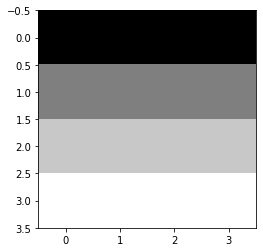

In [6]:
a = np.asarray([
    [0,0,0,0],
    [127,127,127,127],
    [200,200,200,200],
    [255,255,255,255],
],dtype='uint8')

plt.imshow(a, cmap='gray')

(4, 4, 3)


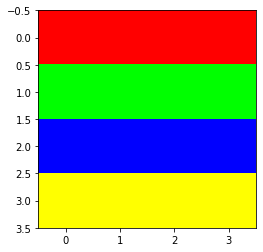

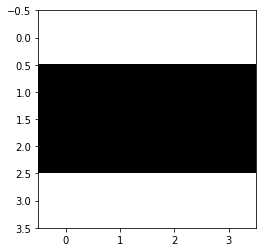

In [10]:
r = np.array([
    [255,255,255,255],
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
],dtype='uint8')

g = np.array([
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
    [255,255,255,255],
],dtype='uint8')

b = np.array([
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
],dtype='uint8')

colors = np.dstack([r,g,b]) # 모든 컬러 이미지는 3채널로 만들어줘야한다. 2채널 컬러는 없음!
print(colors.shape)
plt.imshow(colors)
plt.show()
plt.imshow(r, cmap='gray')
plt.show()

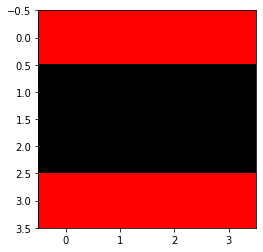

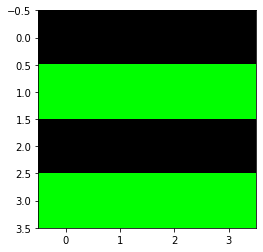

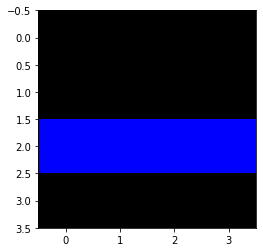

In [17]:
z = np.zeros((4,4),dtype='uint8') # 0으로 채워진 4*4행렬 생성

rr = np.dstack([r,z,z])
gg = np.dstack([z,g,z])
bb = np.dstack([z,z,b])

plt.imshow(rr)
plt.show()
plt.imshow(gg)
plt.show()
plt.imshow(bb)
plt.show()

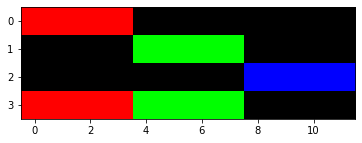

In [18]:
all = np.hstack([rr,gg,bb]) # 가로로 스택을 쌓음
plt.imshow(all)

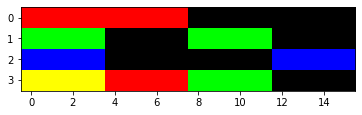

In [20]:
all = np.hstack([np.dstack([r,g,b]), rr,gg,bb])
plt.imshow(all)

In [23]:
import cv2

<class 'numpy.ndarray'>
(333, 500, 3)


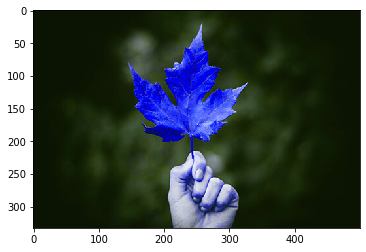

In [26]:
img = cv2.imread("red.jpg")
print(type(img))
print(img.shape)

plt.imshow(img)

# BGR 순서로 출력해서 색깔이 이상하게 출력된다.
# 그냥 그 당시 제조사에서 그렇게 썼기 때문에,,
# 채널을 바꿔줘야 제대로 된 색이 출력된다. => 자동으로 된 코딩도 있음!

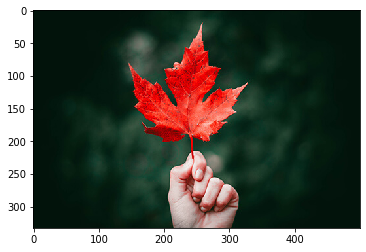

In [28]:
# 원래 데이터에서 각각의 채널을 뽑아내기(*슬라이싱*)
b = img[:,:,0] # 첫번째 채널은 blue 채널
g = img[:,:,1]
r = img[:,:,2]

rgb = np.dstack([r,g,b])
plt.imshow(rgb)

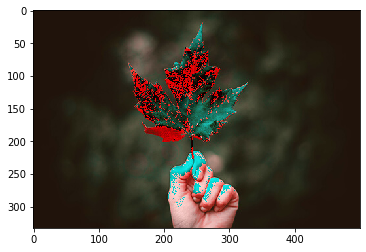

In [34]:
b = img[:,:,0] 
g = img[:,:,1]
r = img[:,:,2] + 30  # 빨간색 셀로판지를 덧댄 것이라 생각하면 편함.
                     # 완전히 색이 변했다면, 오버플로우가 일어난 것.
rgb = np.dstack([r,g,b])
plt.imshow(rgb)

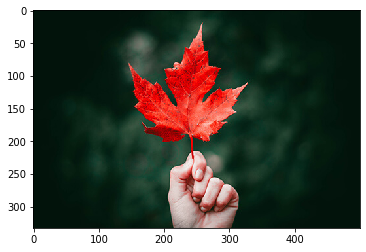

In [36]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# BGR 순서를 RGB로 변환시켜주는 함수
# **처리하는 과정에서 사용하면 안됨!** 마지막에 화면에 보여줄 때만 사용해야한다.
plt.imshow(rgb)

In [37]:
cv2.imwrite("result.jpg",rgb)
# 이미지를 생성하는 함수. r과 g 가 바뀌어서 출력된다.

True

###  html 태그로 결과 이미지 출력
<img src = result.jpg width=200>

In [40]:
img = cv2.imread("people.jpg")
# HIS = Hue(색상), Saturation(채도), Intensity(명도)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

result = img.copy() # img 원본이 존재하고, img를 복사해서 사용하는 것
print(result.shape)
print(result.shape[0])

(541, 442, 3)
541


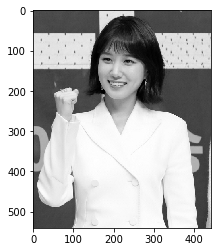

In [41]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]):  # 모든 픽셀을 다 도는 거임
        col = (int(img[r,c,0]) + int(img[r,c,1]) + int(img[r,c,2])) / 3  # 흑백사진으로 바꾸는 방법
        result[r,c,0] = col;
        result[r,c,1] = col;
        result[r,c,2] = col;

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# lower = np.array([0,48,80], dtype='uint8')
# upper = np.array([20,255,255], dtype='uint8')

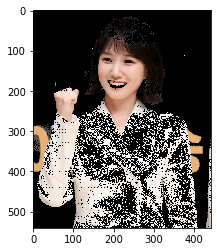

In [45]:
skin = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r,c]>= 0 and h[r,c] <= 20:
            skin[r,c,0] = img[r,c,0]
            skin[r,c,1] = img[r,c,1]
            skin[r,c,2] = img[r,c,2]    
        else:
            skin[r,c,0] = 0
            skin[r,c,1] = 0
            skin[r,c,2] = 0   # 피부색이 아닌건 다 까만색으로
        
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

### 원본 / 스킨 / 마스크(피부색) 로 표현하기

In [ ]:
img = cv2.imread("people.jpg")

skin = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r,c]>= 0 and h[r,c] <= 20:
            skin[r,c,0] = img[r,c,0]
            skin[r,c,1] = img[r,c,1]
            skin[r,c,2] = img[r,c,2]    
        else:
            skin[r,c,0] = 0
            skin[r,c,1] = 0
            skin[r,c,2] = 0   # 피부색이 아닌건 다 까만색으로

            
mask = img.copy()
# lower = np.array([0,48,80], dtype='uint8')
# upper = np.array([20,255,255], dtype='uint8')

In [ ]:
all = np.hstack([img, skin, mask])
plt.imshow(all)

In [46]:
# 파이썬은 포인터가 없지만, 다 포인터라서 없는거임 (?)
a = 8
b = 8 
# 메모리는 int당 4byte씩 필요하므로 8byte가 필요할 것 같지만
# 4byte만 할당됨. '8'로 값이 같기 때문에
# a와 b의 주소값은 같음. 
print(id(a))
print(id(b))

140707519111792
140707519111792
